1. Database Setup and Import: Import All Modules Create a MySQL Database 
Load the Dataset into MySQL:
Save the uploaded crime_data.csv file and use a tool like MySQL Workbench or a command-line tool to import the CSV file into the crimes table.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

2. Database Connection: Use PyMySQL to establish a connection to the database in Jupter notebook.


In [98]:
import pymysql

# Establish a connection to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='Pass@123',
                             database='crime_data')
print (connection)


In [99]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [100]:
query="SELECT * FROM crimes;"
df=pd.read_sql(query,connection)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


3. Data Exploration: Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.


In [101]:
# Retrieve data into a pandas DataFrame
query = "SELECT * FROM crimes;"
crime_data = pd.read_sql(query, connection)

# Basic statistics
print(crime_data.describe())

# Unique values in specific columns
print(crime_data['Crm_Cd'].nunique(), "unique crime codes")
print(crime_data['Crm_Cd_Desc'].unique())


              DR_NO      Crm_Cd    Vict_Age         LAT         LON
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000
mean   1.999930e+08  504.178357   32.142285   34.047335 -118.261283
std    8.742243e+06  198.381863   20.202136    0.053840    0.041560
min    1.030447e+07  210.000000    0.000000   33.710000 -118.560000
25%    2.001044e+08  330.000000   23.000000   34.040000 -118.260000
50%    2.001048e+08  442.000000   31.000000   34.050000 -118.250000
75%    2.001064e+08  624.000000   46.500000   34.050000 -118.240000
max    2.220130e+08  956.000000   78.000000   34.280000 -118.190000
42 unique crime codes
['BATTERY - SIMPLE ASSAULT' 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)' 'OTHER MISCELLANEOUS CRIME'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'BURGLARY FROM VEHICLE' 'CRIMINAL THREATS - NO WEAPON DISPLAYED' 'ARSON'
 'THEFT OF IDENTITY' 'ASSAULT 

4. Temporal Analysis: Analyze trends in crime occurrences over time.


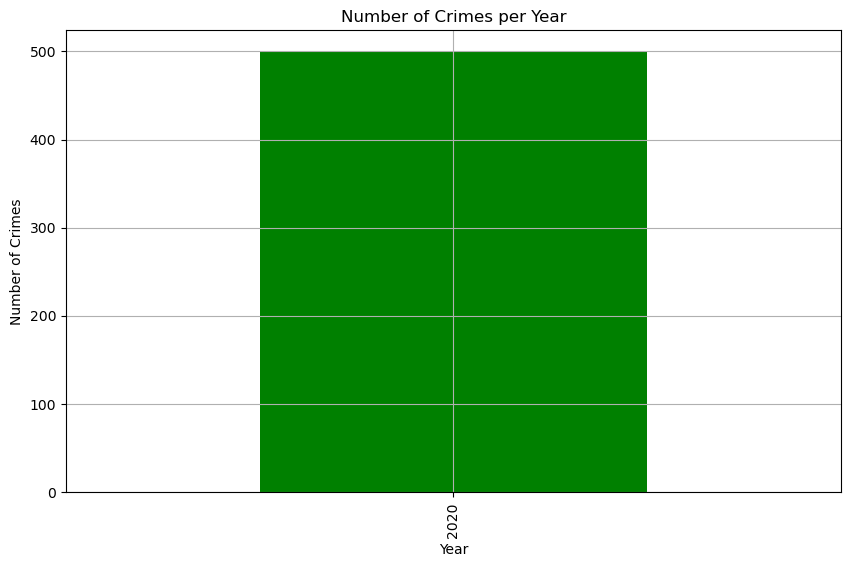

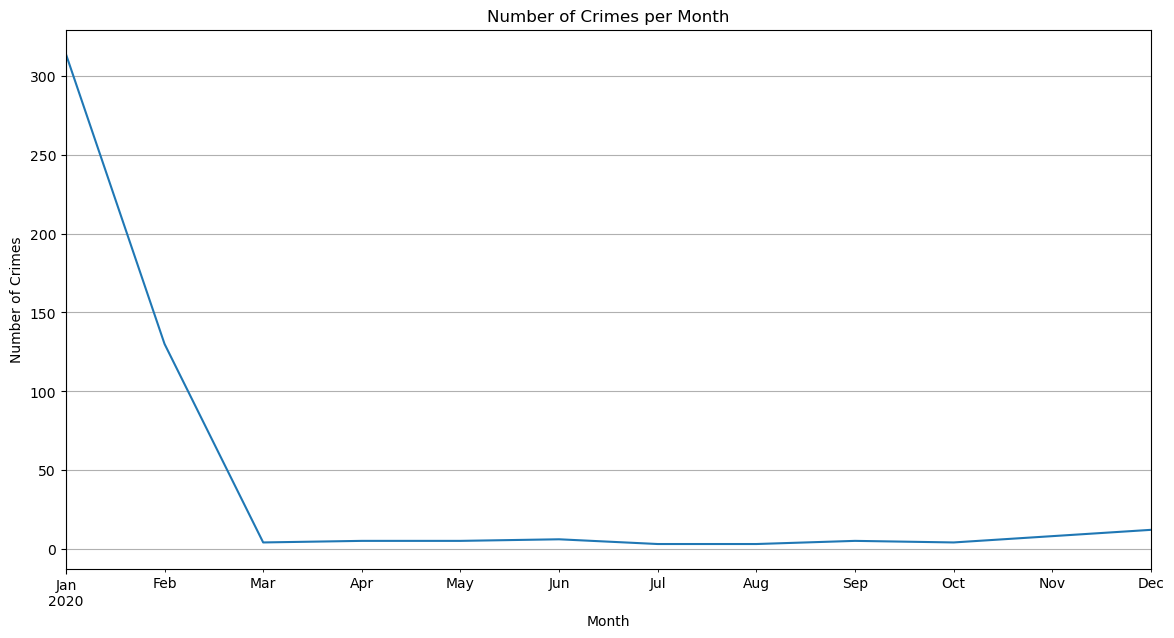

In [102]:
import matplotlib.pyplot as plt

# Convert date columns to datetime
crime_data['DATE_OCC'] = pd.to_datetime(crime_data['DATE_OCC'])
crime_data['Date_Rptd'] = pd.to_datetime(crime_data['Date_Rptd'])

# Create a new column for year and month
crime_data['year'] = crime_data['DATE_OCC'].dt.year
crime_data['month'] = crime_data['DATE_OCC'].dt.to_period('M')

# Plot the trend of crimes over time
crimes_per_year = crime_data['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
crimes_per_year.plot(kind='bar', color='green')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# Plot the trend of crimes per month
crimes_per_month = crime_data['month'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
crimes_per_month.plot()
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


5. Spatial Analysis: Visualize Crime Hotspots on a Map.


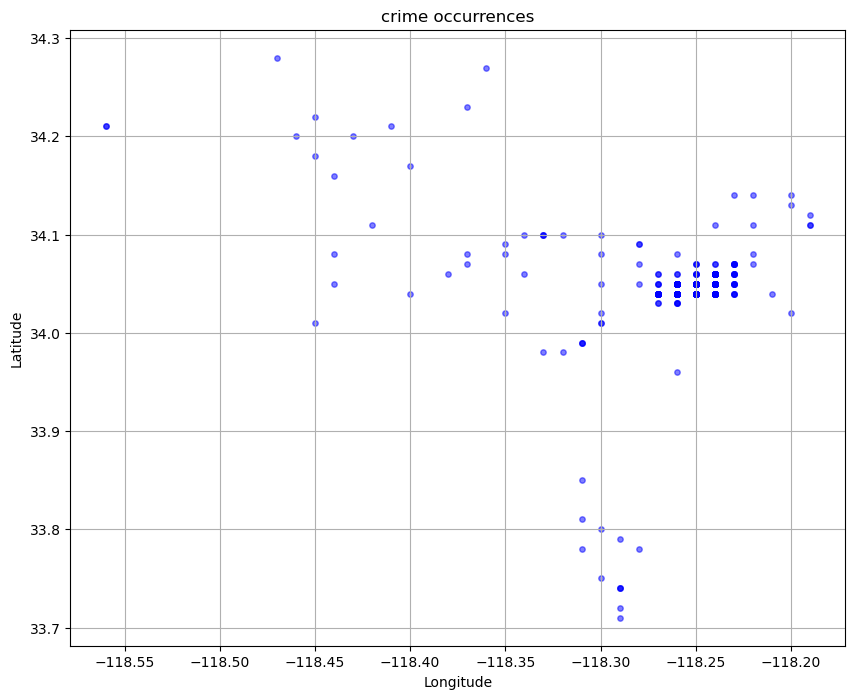

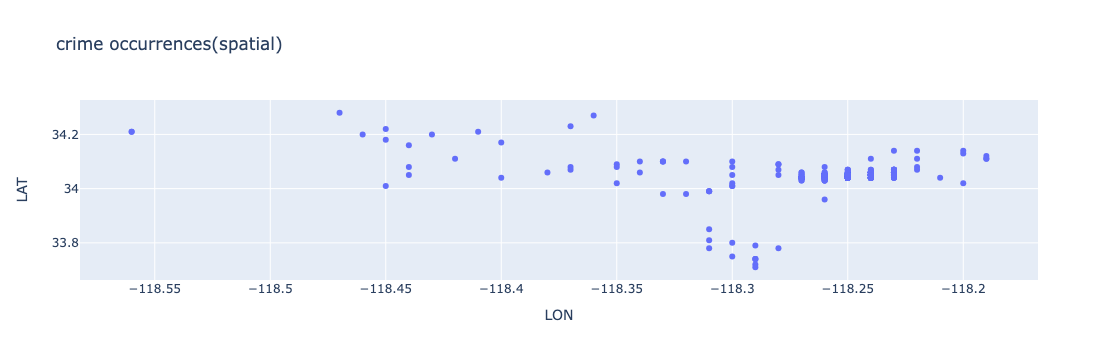

In [103]:
#using matplotlib
plt.figure(figsize=(10,8))
plt.scatter(df['LON'], df['LAT'], s=15, alpha=0.5, c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('crime occurrences')
plt.grid(True)
plt.show()

#using plotly.express
#create scatter plot
fig = px.scatter(df, x='LON', y='LAT', title='crime occurrences(spatial)')
fig.show()


6. Victim Demographics: Distribution of Victim Ages and Genders.


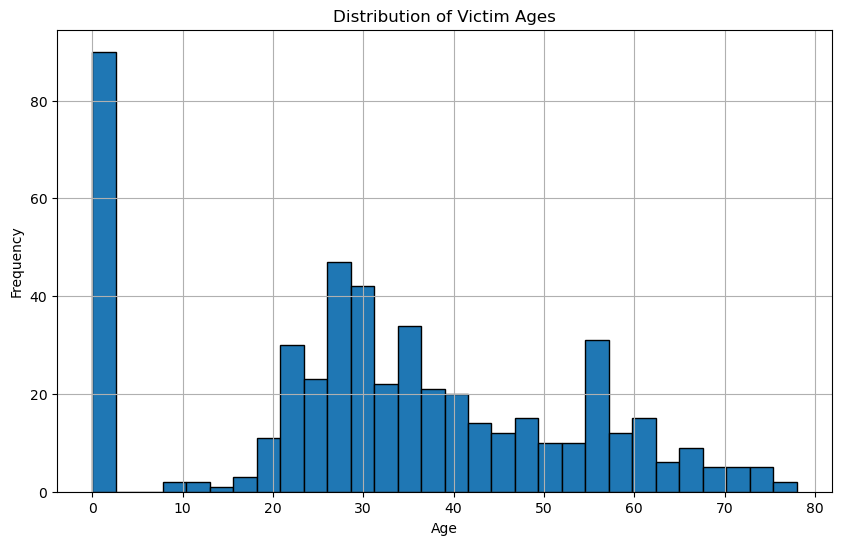

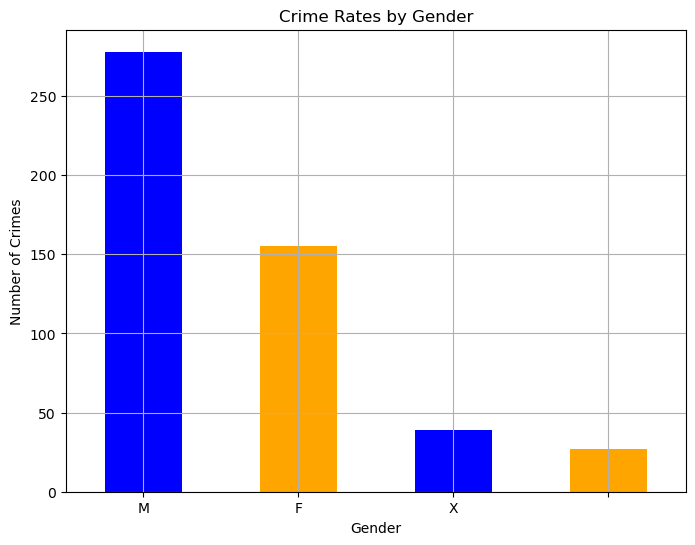

In [104]:
# Distribution of victim ages
plt.figure(figsize=(10, 6))
crime_data['Vict_Age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Crime rates between male and female victims
gender_counts = crime_data['Vict_Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Crime Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


7. Status Analysis: Examine the Status of Reported Crimes.


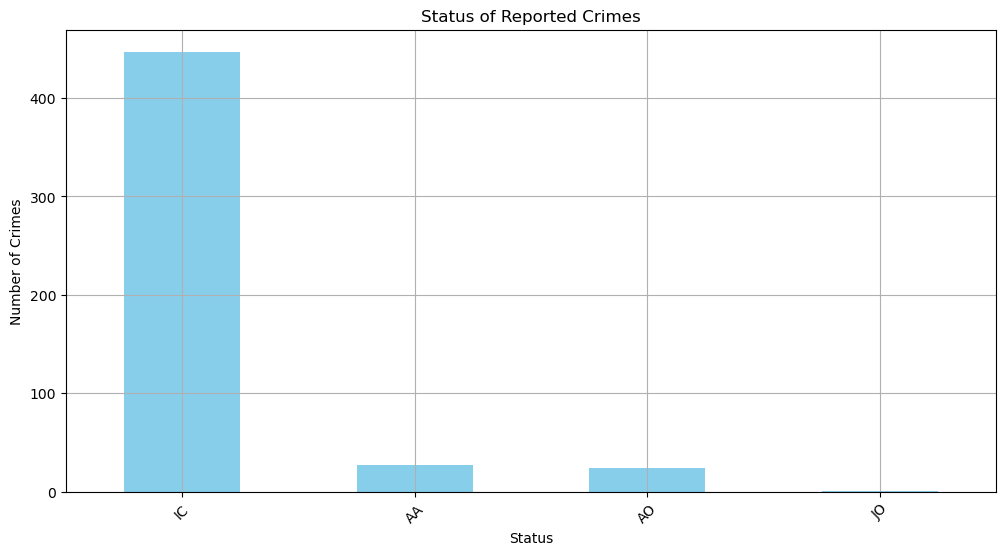

In [105]:
# Status of reported crimes

status_counts = crime_data['Status'].value_counts()

plt.figure(figsize=(12, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Status of Reported Crimes')
plt.xlabel('Status')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Questions:

1. Where are the geographical hotspots for reported crimes?

-- Los Angeles of California states between latitude 34 degree to 34.1 degree and longitude -118.30 degree to -118.20 degree is a significant hotspot for reported crime.

2.
1. What is the distribution of victim ages in reported crimes?
-- From the analysis of the histogram, In our dataset, there are zero values in the age column. we can see that most of the crimes happened in the age group of 0 to 5, and the frequency of that age group is above 90. The age group of 23 to 35 the crime frequency is above 50.
   
2. Is there a significant difference in crime rates between male and female victims?
-- Yes there is a significant difference between male and female crime rates.
   The male victims committed more crimes than femals and x victims.
   Males crimes rate is above than 250.
   The females have a crime rate is about 150.
   The x victims have crime rate less than 50.
   

In [112]:
# 3. Where do most crimes occur based on the "Location" column?
# to know the most crime that occured.

import pandas as pd

location_counts=df['Location'].value_counts()

#print the top 5 most frequent locations.

print("top 10 locations where crimes occur:")
print(location_counts.head(10)) 


top 10 locations where crimes occur:
Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
100 E 5TH ST           5
600 S SPRING ST        5
500 S SAN PEDRO ST     5
7TH ST                 5
700 S FLOWER ST        4
Name: count, dtype: int64


Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


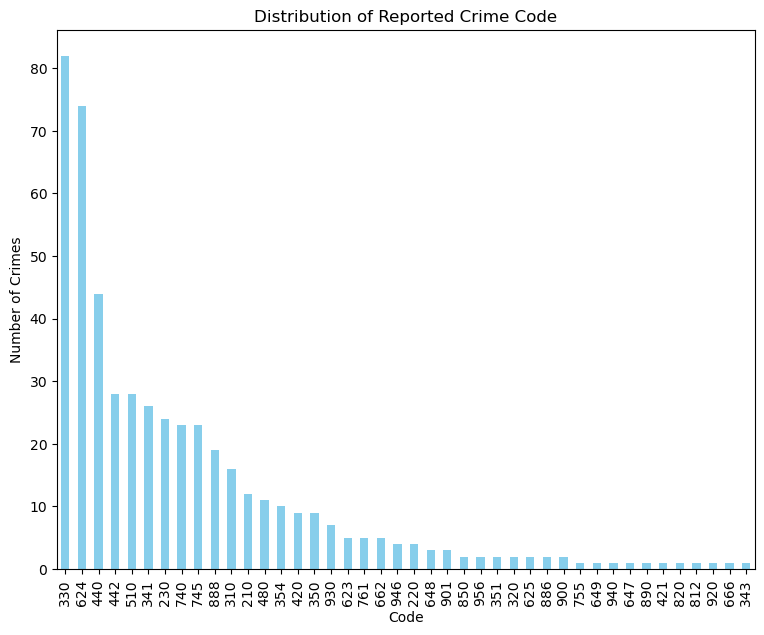

In [96]:
# 4. What is the distribution of reported crimes based on Crime Code?

#Get the premises descriptions

code=df['Crm_Cd']
count_of_codes = code.value_counts()
print(count_of_codes)

#Visualize the distribution of crime statuses

plt.figure(figsize=(9, 7))
count_of_codes.plot(kind='bar', color='skyblue')
plt.title('Distribution of Reported Crime Code')
plt.xlabel('Code')
plt.ylabel('Number of Crimes')
plt.show()

From the above, we have concluded that crime code 330 has the most occurrences with more than 82.